In [42]:
import os
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from random import choice
from collections import defaultdict

# 1. Network characteristics

## Write code for Erdos-Renyi and Small World (Watts-Strogaz) models, make loglog degree plots for them and for academic coauthotship real dataset [12 points]

Generate a random graph from both the Erdős-Rényi (i.e., G(n, m)) and Small-World models and read in the collaboration network. Delete all of the self-edges in the collaboration network (there should be 14,484 total edges remaining). Plot the degree distribution of all three networks in the same plot on a log-log scale. In other words, generate a plot with the horizontal axis representing node degrees and the vertical axis representing the proportion of nodes with a given degree (by “log-log scale” we mean that both the horizontal and vertical axis must be in logarithmic scale). In one to two sentences, describe one key difference between the degree distribution of the collaboration network and the degree distributions of the random graph models.

What to submit Page 1:
Log-log degree distribution plot for all three networks (in same plot)

### Erdos-Renyi Random graph (G(n;m) random network):
Generate a random instance of this model by using n = 5242 nodes and picking m = 14484 edges at random. Write code to construct instances of this model, i.e., do not call a SNAP function.



In [2]:
erdosRenyi = None
smallWorld = None
collabNet = None


def genErdosRenyi(N=5242, M=14484):
    """
    :param - N: number of nodes
    :param - M: number of edges

    return: Erdos-Renyi graph with N nodes and E edges
    """
    
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    edge_set = set()
    while True:
        n1, n2 = choice(range(N)), choice(range(N))
        if n1 == n2:
            continue
        if (n1, n2) not in edge_set and (n2, n1) not in edge_set:
            edge_set.add((n1, n2))
        if len(edge_set) == M:
            break
        
    G.add_edges_from((edge_set))

    return G

In [3]:
G = genErdosRenyi(5242, 14484)

In [4]:
G.number_of_nodes(), G.number_of_edges() 

(5242, 14484)

### Small-World Random Network: 
Generate an instance from this model as follows: begin with n = 5242 nodes arranged as a ring, i.e., imagine the nodes form a circle and each node is connected to its two direct neighbors (e.g., node 399 is connected to nodes 398 and 400), giving us 5242 edges. Next, connect each node to the neighbors of its neighbors (e.g., node 399 is also connected to nodes 397 and 401). This gives us another 5242 edges. Finally, randomly select 4000 pairs of nodes not yet connected and add an edge between them. In total, this will make m = 5242  2+4000 = 14484

In [5]:
def genCircle(N=5242):
    """
    :param - N: number of nodes

    return: Circle graph with N nodes and N edges. Imagine the nodes form a
        circle and each node is connected to its two direct neighbors.
    """
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    edge_set = set()
    node = 0
    for node in range(N - 1):
        edge_set.add((node, node + 1))
            
    edge_set.add((N - 1,0))

    G.add_edges_from((edge_set))

    return G

In [6]:
x = 10

G1 = genCircle(x)
G1.number_of_edges()

10

In [7]:
G1 = genCircle(x)
G2 = connectNbrOfNbr(G1, x)

G1.number_of_edges(), G2.number_of_edges()

NameError: name 'connectNbrOfNbr' is not defined

In [8]:
def connectNbrOfNbr(G, N=5242):
    """
    :param - G
    :param - N: number of nodes

    return: Graph object with additional N edges added by connecting each node
        to the neighbors of its neighbors
    """
    G = G.copy()
    
    edge_set = set(G.edges)
    node = 0
    for node in range(1, N - 1):
        edge_set.add((node - 1, node + 1))
            
    edge_set.add((0, N - 2))
    edge_set.add((1, N - 1))
    
    G.add_edges_from((edge_set))
    
    return G

In [9]:
def connectRandomNodes(G, M):
    """
    :param - M: number of edges to be added

    return: Graph object with additional M edges added by connecting M randomly
        selected pairs of nodes not already connected.
    """

    G = G.copy()
    N = G.number_of_nodes()
    
    edge_set = set(G.edges)
    
    i = 0
    
    while True:
        n1, n2 = choice(range(N)), choice(range(N))
        if n1 == n2:
            continue
        if (n1, n2) not in edge_set and (n2, n1) not in edge_set:
            edge_set.add((n1, n2))
            i += 1
        if i == M:
            break
        
    G.add_edges_from((edge_set))
    
    return G

In [10]:
x = 5242
y = 4000

G1 = genCircle(x)
G2 = connectNbrOfNbr(G1, x)
G3 = connectRandomNodes(G2, y)
a = G2.number_of_nodes()

G1.number_of_edges(), G2.number_of_edges(), G3.number_of_edges()

(5242, 10484, 14484)

In [11]:
def genSmallWorld(N, E):
    """
    :param - N: number of nodes
    :param - M: number of edges

    return type: snap.PUNGraph
    return: Small-World graph with N nodes and E edges
    """
    G = genCircle(N)
    G = connectNbrOfNbr(G, N)
    
    #G.number_of_edges() + 
    
    y = E - G.number_of_edges()
    
    G = connectRandomNodes(G, y)
    return G

In [12]:
G = genSmallWorld(5242, 14484)
G.number_of_edges(), G.number_of_nodes()

(14484, 5242)

### Real-World Collaboration Network:
Download this undirected network from http://snap.stanford.edu/data/ca-GrQc.txt.gz. Nodes in this network represent authors of research papers on the arXiv in the General Relativity and Quantum Cosmology section. There is an edge between two authors if they have co-authored at least one paper together. Note that some edges may appear twice in the data, once for each direction. Ignoring repeats and self-edges, there are 5242 nodes and 14484 edges. (Note: Repeats are automatically ignored when loading an (un)directed graph with SNAP's LoadEdgeList function).

In [14]:
CN_G = nx.read_edgelist('data/ca-GrQc.txt', comments='#', delimiter='\t', create_using=nx.Graph)
CN_G.remove_edges_from(nx.selfloop_edges(CN_G))
CN_G.number_of_edges(), CN_G.number_of_nodes()

(14484, 5242)

## Degree Distribution [12 points]
Generate a random graph from both the Erd}os-Renyi (i.e., G(n;m)) and Small-World models and read in the collaboration network. Delete all of the self-edges in the collaboration network (there should be 14,484 total edges remaining).

Plot the degree distribution of all three networks in the same plot on a log-log scale. In other words, generate a plot with the horizontal axis representing node degrees and the vertical axis representing the proportion of nodes with a given degree (by \log-log scale" we mean that both the horizontal and vertical axis must be in logarithmic scale). In one to two sentences, describe one key dierence between the degree distribution of the collaboration network and the degree distributions of the random graph models.



In [15]:
ER_G = genErdosRenyi(5242, 14484)
SW_G = genSmallWorld(5242, 14484)
#CN_G = 

In [16]:
#list(ER_G.degree())
import collections
degree_sequence = sorted([d for n, d in ER_G.degree()], reverse=True)
degree_sequence
degreeCount = collections.Counter(degree_sequence)
#deg, cnt = zip(*degreeCount.items())
degreeCount

Counter({17: 1,
         16: 2,
         15: 3,
         14: 9,
         13: 16,
         12: 31,
         11: 75,
         10: 149,
         9: 274,
         8: 439,
         7: 630,
         6: 839,
         5: 944,
         4: 812,
         3: 582,
         2: 301,
         1: 115,
         0: 20})

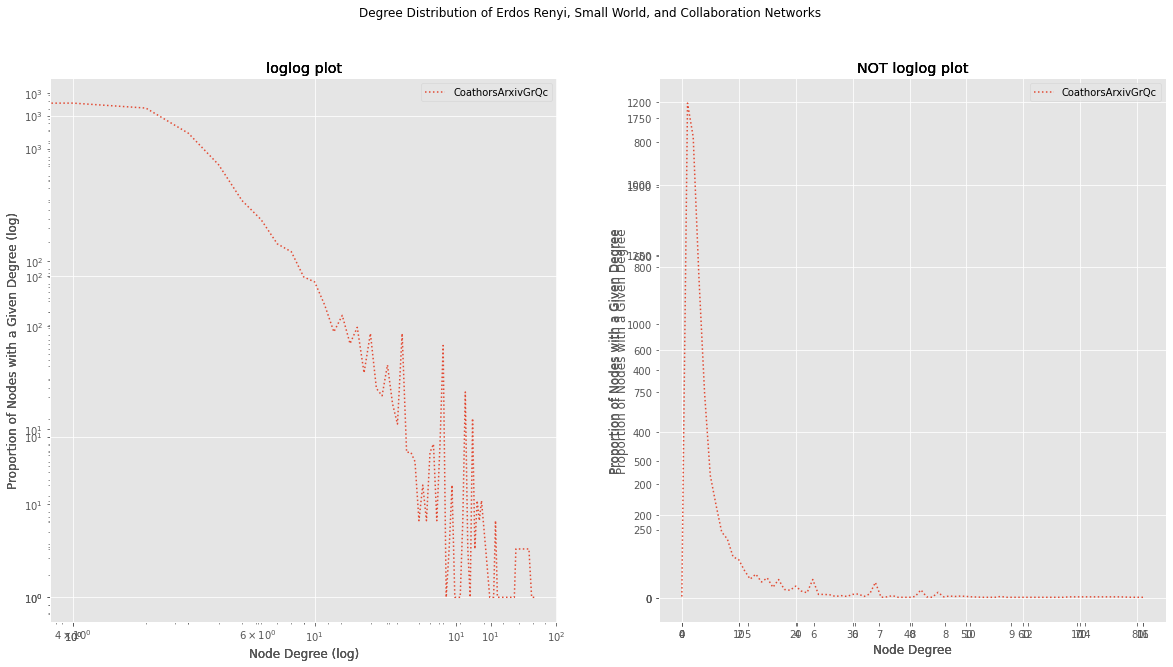

In [17]:
import collections

plt.style.use('ggplot')
fig = plt.figure(figsize = (20,10))
plt.suptitle('Degree Distribution of Erdos Renyi, Small World, and Collaboration Networks')

#for i,graph_type in enumerate(['ErdosRenyi','SmallWorld','CoathorsArxivGrQc']):
for graph_type in ['ErdosRenyi','SmallWorld','CoathorsArxivGrQc']:
    if graph_type == 'ErdosRenyi':
        G = genErdosRenyi(5242,14484)
    if graph_type == 'SmallWorld':
        G =  genSmallWorld(5242, 14484)
    if graph_type == 'CoathorsArxivGrQc':
        G = CN_G
        

#     degree_list = list(G.degree())
#     list_degs = []
#     list_counts = []
#     for i,j in degree_list:
#         list_degs.append(int(i))
#         list_counts.append(j)
        
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    
    

    fig.add_subplot(1,2,1)
    plt.loglog(deg, cnt, linestyle = 'dotted',  label = graph_type)
    plt.xlabel('Node Degree (log)')
    plt.ylabel('Proportion of Nodes with a Given Degree (log)')
    plt.title('loglog plot')
    plt.legend()

    fig.add_subplot(1,2,2)
    plt.plot(deg, cnt, linestyle = 'dotted', label = graph_type)
    plt.xlabel('Node Degree')
    plt.ylabel('Proportion of Nodes with a Given Degree')
    plt.title('NOT loglog plot')
    plt.legend()
plt.show()

## Clustering Coefficient [13 points]
What to submit: Average clustering coefficient for each network. Network that has the largest average clustering coefficient. One to two sentences explaining why this network has the largest average clustering coefficient.

In [18]:
SW_G.degree(2) - 1 

4

In [19]:
2* len(list(SW_G.edges(list(SW_G.neighbors(2)))))


48

In [20]:
64/30


2.1333333333333333

In [21]:
def calcClusteringCoefficientSingleNode(Node, G):
    """
    :param - Node:
    :param - Graph:

    return type: float
    returns: local clustering coeffient of Node
    """
    #G = G.copy()
    C = 0.0
    
    node_degree = G.degree(Node)
    neighbors_nodes = list(G.neighbors(Node))
    count_neighbors_edge = 0
    
    if node_degree < 2:
        C = 0.0
    else: 
        for edge in list(G.edges(neighbors_nodes)):
            if edge[0] in neighbors_nodes and edge[1] in neighbors_nodes:
                count_neighbors_edge += 1
        C = (2 * count_neighbors_edge) / (node_degree * (node_degree - 1))
    
    
    return C

In [22]:
    node_degree = SW_G.degree(2)
    neighbors_nodes = list(SW_G.neighbors(2))
    #node_degree, neighbors_nodes, node_degree * (node_degree - 1), SW_G.edges(neighbors_nodes), calcClusteringCoefficientSingleNode(2, SW_G)
        
    neighbors_nodes
    
#     for edge in list(SW_G.edges(neighbors_nodes)):
#         if edge[0] in neighbors_nodes and edge[1] in neighbors_nodes:
#             print(edge[0], edge[1])

[0, 1, 3, 4, 3831]

In [23]:
C = 0.0

for i in SW_G.nodes:
    C += calcClusteringCoefficientSingleNode(i, SW_G)

print(C)

1492.298340548319


In [24]:
calcClusteringCoefficientSingleNode(2, SW_G)

0.3

In [25]:
def calcClusteringCoefficient(G):
    """
    :param - Graph:

    return type: float
    returns: clustering coefficient of Graph
    """

    C = 0.0

    for node in G.nodes:
        C += calcClusteringCoefficientSingleNode(node, G)
    
    C = (C / G.number_of_nodes())
    
    return C

In [26]:
print('average clustering ER:', calcClusteringCoefficient(ER_G),'built-in:', nx.average_clustering(ER_G),
      '\naverage clustering SW:', calcClusteringCoefficient(SW_G),'built-in:', nx.average_clustering(SW_G),
      '\naverage clustering CN:', calcClusteringCoefficient(CN_G),'built-in:', nx.average_clustering(CN_G))

average clustering ER: 0.0014061153988662574 built-in: 0.0014061153988662574 
average clustering SW: 0.28468110273718406 built-in: 0.28468110273718406 
average clustering CN: 0.529635811052136 built-in: 0.529635811052136


# Structural Roles: Rolx and ReFex [25 points]

## Basic Features [5 points]

We begin by loading the graph G provided in the bundle and computing three basic features for
the nodes. For each node v, we choose 3 basic local features (in this order):
1. the degree of v, i.e., deg(v);
2. the number of edges in the egonet of v, where egonet of v is defined as the subgraph of G
induced by v and its neighborhood;
3. the number of edges that connect the egonet of v and the rest of the graph, i.e., the number
of edges that enter or leave the egonet of v.
We use  ̃Vu to represent the vector of the basic features of node u. For any pair of nodes u and v, we
can use cosine similarity to measure how similar two nodes are according to their feature vectors x
and y:
Sim(x,y) = x ·y
||x||2 ·||y||2
=
∑
i xiyi√∑
i x2i ·
√∑
i y2i
;
Also, when ||x||2 = 0 or ||y||2 = 0, we defined Sim(x,y) = 0.


Compute the basic feature vector for the node with ID 9, and report the top 5 nodes that are most
similar to node 9 (excluding node 9). As a sanity check, no element in  ̃V9 is larger than 10.

In [30]:
sG = nx.read_gml('data/netscience.gml', label='id')

sG.number_of_edges(), sci_G.number_of_nodes()

NameError: name 'sci_G' is not defined

In [31]:
type(sG), sG#, sG.edges()

(networkx.classes.graph.Graph, <networkx.classes.graph.Graph at 0x1343978e0>)

In [32]:
def getBasicFeaturesNode(Node, G):
    """
    :param - Node:
    :param - Graph:
    
    Calculate three basic features for input node v
    1. degree of v
    2. number of edges in the egonet of node v
       here we have to iterate every node
    3. number of edges enter or leaving the egonet of node v
       here it's a undirected and unweighted graph, so we 
       can simplely count it with (tot_edges-inner_edges)

    return type: Dict
    returns: 3 basic features of a node
    """
    
    features_dict = {}
    
    node_degree = G.degree(Node)
    
    egonet_nodes = list(G.neighbors(Node))
    egonet_nodes.append(Node)
    egonet = G.subgraph(egonet_nodes)
    number_of_edges_egonet = len(list(egonet.edges))
    
    nodes_set = set(G.nodes)
    rest_nodes = nodes_set.difference(set(egonet_nodes))
    number_of_connecting_edges = 0
    
    for i,j in G.edges: #мб через while лучше
        if (i in egonet_nodes and j in rest_nodes) or (i in rest_nodes and j in egonet_nodes):
            number_of_connecting_edges += 1
    
    
    features_dict = {
        'node_degree': node_degree,
        'number_of_edges_egonet': number_of_edges_egonet,
        'number_of_connecting_edges': number_of_connecting_edges
    }
    
    return features_dict

In [33]:
def getBasicFeatures(G):
    
    for i in G.nodes:
        G.add_node(i,
                   node_degree = getBasicFeaturesNode(i, G)['node_degree'],
                   number_of_edges_egonet = getBasicFeaturesNode(i, G)['number_of_edges_egonet'],
                   number_of_connecting_edges = getBasicFeaturesNode(i, G)['number_of_connecting_edges']
                  )
    
    return G

In [34]:
getBasicFeaturesNode(9, sG)

{'node_degree': 6,
 'number_of_edges_egonet': 10,
 'number_of_connecting_edges': 1}

In [35]:
sG2 = getBasicFeatures(sG)
sG2.nodes[9]

{'label': 'HUBERMAN, B',
 'node_degree': 6,
 'number_of_edges_egonet': 10,
 'number_of_connecting_edges': 1}

In [36]:
sG.add_node(9, node_degree = getBasicFeaturesNode(9, sG)['node_degree'])
sG.nodes[9]

{'label': 'HUBERMAN, B',
 'node_degree': 6,
 'number_of_edges_egonet': 10,
 'number_of_connecting_edges': 1}

In [37]:
sG2 = getBasicFeatures(sG)

In [38]:
def calculateCosineSimilarity(x, y):
    
    sim_xy = 0.0
    
    if np.linalg.norm(x) == 0 or np.linalg.norm(y) == 0:
        sim_xy = 0.0
    else:
        sim_xy = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    
    return sim_xy

In [40]:
print(getBasicFeaturesNode(9, sG), getBasicFeaturesNode(10, sG))

{'node_degree': 6, 'number_of_edges_egonet': 10, 'number_of_connecting_edges': 1} {'node_degree': 3, 'number_of_edges_egonet': 6, 'number_of_connecting_edges': 4}


In [43]:
x = list(getBasicFeaturesNode(9, sG).values())
y = list(getBasicFeaturesNode(10, sG).values())

calculateCosineSimilarity(x, y)

0.8969921684948154

In [44]:
#переделать, теперь можно по графу проходиться

x = list(getBasicFeaturesNode(9, sG).values())
result_dict = {}

for i in sG.nodes:
    y = list(getBasicFeaturesNode(i, sG).values())
    #print(calculateCosineSimilarity(x, y))
    result_dict[i] = calculateCosineSimilarity(x, y)
    
#result_dict

In [45]:
result_dict[1]

0.9910548829514426

In [46]:
top_n = 6

dict(sorted(result_dict.items(), key=lambda x: x[1], reverse=True)[:top_n])

{9: 1.0,
 415: 0.9996157540684272,
 286: 0.996343680627828,
 288: 0.996343680627828,
 1054: 0.9961182380000687,
 1336: 0.9961182380000687}

## Recursive Features [8 points]

In this next step, we recursively generate some more features. We use mean and sum as aggregation
functions.

![qwe](img/recursive-features.png)

For this exercise, run K = 2 iterations, and report the top 5 nodes that are most similar to node 9
(excluding node 9). If there are ties, e.g. 4th, 5th, and 6th have the same similarity, report any of
them to fill up the top-5 ranking. As a sanity check, the similarities between the reported nodes
and node 9 are all greater than 0.9. [5 points]  
Compare your obtained top 5 nodes with previous results from 2.1. In particular, are there common
nodes? Are there different nodes? In one sentence, why would this change? [3 points]

In [48]:
def getBasicFeaturesNode(Node, G):

    features_dict = {}
    
    node_degree = G.degree(Node)
    
    egonet_nodes = list(G.neighbors(Node))
    egonet_nodes.append(Node)
    egonet = G.subgraph(egonet_nodes)
    number_of_edges_egonet = len(list(egonet.edges))
    
    nodes_set = set(G.nodes)
    rest_nodes = nodes_set.difference(set(egonet_nodes))
    number_of_connecting_edges = 0
    for i,j in G.edges: #мб через while лучше
        if (i in egonet_nodes and j in rest_nodes) or (i in rest_nodes and j in egonet_nodes):
            number_of_connecting_edges += 1
    
    
    features_dict = {
        'node_degree': node_degree,
        'number_of_edges_egonet': number_of_edges_egonet,
        'number_of_connecting_edges': number_of_connecting_edges
    }
    
    return features_dict

In [49]:
def calcClusteringCoefficientSingleNode(Node, G):
    """
    :param - Node:
    :param - Graph:

    return type: float
    returns: local clustering coeffient of Node
    """
    #G = G.copy()
    C = 0.0
    
    node_degree = G.degree(Node)
    neighbors_nodes = list(G.neighbors(Node))
    count_neighbors_edge = 0
    
    if node_degree < 2:
        C = 0.0
    else: 
        for edge in list(G.edges(neighbors_nodes)):
            if edge[0] in neighbors_nodes and edge[1] in neighbors_nodes:
                count_neighbors_edge += 1
        C = (2 * count_neighbors_edge) / (node_degree * (node_degree - 1))
    
    
    return C


In [50]:
sG.nodes(data=True)[9]

{'label': 'HUBERMAN, B',
 'node_degree': 6,
 'number_of_edges_egonet': 10,
 'number_of_connecting_edges': 1}

In [51]:
def get_recursive_features(graph, num_iter=2):
    graph_attrs = dict()

    for iter in range(1, num_iter + 1):
        for node in graph.nodes(data=True):
            node_label, node_features = node[0], node[1]
            node_degree = nx.degree(graph, node_label)
            node_neighbors = nx.subgraph(graph, list(nx.neighbors(graph, node_label)))

            node_attrs = defaultdict(int)

            if len(node_neighbors) > 0:
                for node_neighbor in node_neighbors.nodes(data=True):
                    for f_name, f_val in node_neighbor[1].items():
                        if f_name != 'label':
                            node_attrs[f"iter{iter}_sum_{f_name}"] += f_val
                            node_attrs[f"iter{iter}_mean_{f_name}"] += f_val / node_degree
            else:
                for f_name, _ in node_features.items():
                    node_attrs[f"iter{iter}_sum_{f_name}"] = 0
                    node_attrs[f"iter{iter}_mean_{f_name}"] = 0

            graph_attrs[node_label] = dict(node_attrs)
        
        nx.set_node_attributes(graph, graph_attrs)

get_recursive_features(sG, 2)

In [53]:
get_recursive_features(2, sG)[9]

TypeError: unsupported operand type(s) for +: 'Graph' and 'int'

# Community detection using the Louvain algorithm [25 points]